In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [9]:
import matplotlib.pyplot as plt
import os
from keras.utils import to_categorical

Using TensorFlow backend.


In [10]:
dataset = pd.read_csv('data/Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


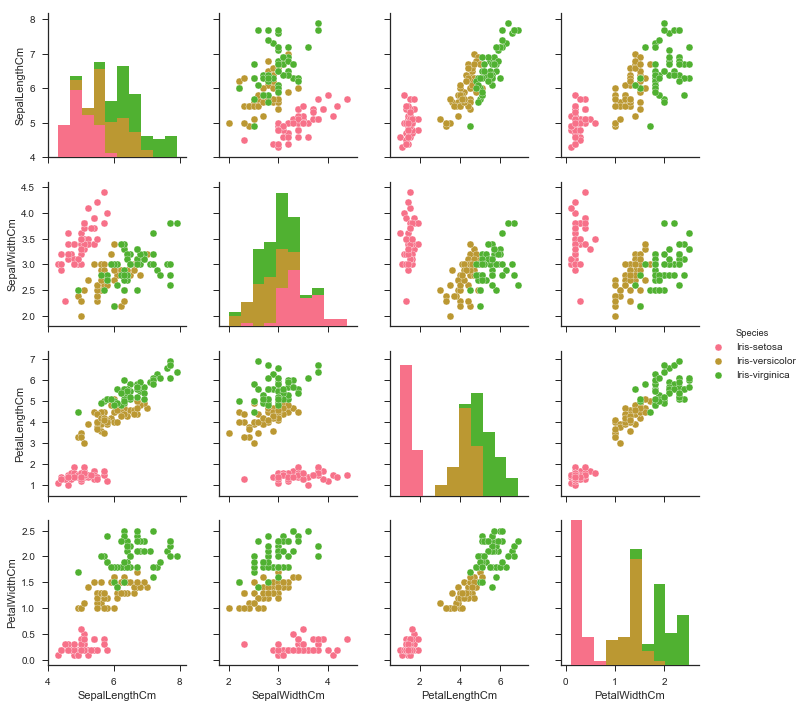

In [12]:
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(dataset.iloc[:,1:6],hue="Species")

In [15]:
#Splitting the data into training and test test
X = dataset.iloc[:,1:5].values
y = dataset.iloc[:,5].values
y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values
Y[0:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [18]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(4,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(3,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 21        
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


In [19]:
#fitting the model and predicting 
model.fit(X_train,y_train,epochs=100)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
120/120 [==============================] - 0s 3ms/step - loss: 1.1044 - acc: 0.4500
Epoch 2/100
120/120 [==============================] - 0s 116us/step - loss: 0.7796 - acc: 0.7083
Epoch 3/100
120/120 [==============================] - 0s 116us/step - loss: 0.6018 - acc: 0.6917
Epoch 4/100
120/120 [==============================] - 0s 125us/step - loss: 0.4917 - acc: 0.7417
Epoch 5/100
120/120 [==============================] - 0s 133us/step - loss: 0.4209 - acc: 0.8167
Epoch 6/100
120/120 [==============================] - 0s 100us/step - loss: 0.3233 - acc: 0.9500
Epoch 7/100
120/120 [==============================] - 0s 158us/step - loss: 0.2084 - acc: 0.9583
Epoch 8/100
120/120 [==============================] - 0s 100us/step - loss: 0.1542 - acc: 0.9417
Epoch 9/100
120/120 [==============================] - 0s 83us/step - loss: 0.1657 - acc: 0.9500
Epoch 10/100
120/120 [==============================] - 0s 91us/step - loss: 0.1115 - acc: 0.9750
Epoch 11/100
120/120 [=

120/120 [==============================] - 0s 100us/step - loss: 0.0595 - acc: 0.9833
Epoch 83/100
120/120 [==============================] - 0s 75us/step - loss: 0.1266 - acc: 0.9583
Epoch 84/100
120/120 [==============================] - 0s 83us/step - loss: 0.0589 - acc: 0.9833
Epoch 85/100
120/120 [==============================] - 0s 83us/step - loss: 0.0934 - acc: 0.9667
Epoch 86/100
120/120 [==============================] - 0s 66us/step - loss: 0.0801 - acc: 0.9750
Epoch 87/100
120/120 [==============================] - ETA: 0s - loss: 0.0287 - acc: 0.968 - 0s 83us/step - loss: 0.0593 - acc: 0.9750
Epoch 88/100
120/120 [==============================] - 0s 75us/step - loss: 0.0958 - acc: 0.9500
Epoch 89/100
120/120 [==============================] - 0s 116us/step - loss: 0.0891 - acc: 0.9750
Epoch 90/100
120/120 [==============================] - 0s 125us/step - loss: 0.0604 - acc: 0.9833
Epoch 91/100
120/120 [==============================] - 0s 100us/step - loss: 0.0665 - acc

In [20]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      0.77      0.87        13
          2       0.67      1.00      0.80         6

avg / total       0.93      0.90      0.90        30

[[11  0  0]
 [ 0 10  3]
 [ 0  0  6]]
